In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("datasets/glass.xlsx", sheet_name="glass")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

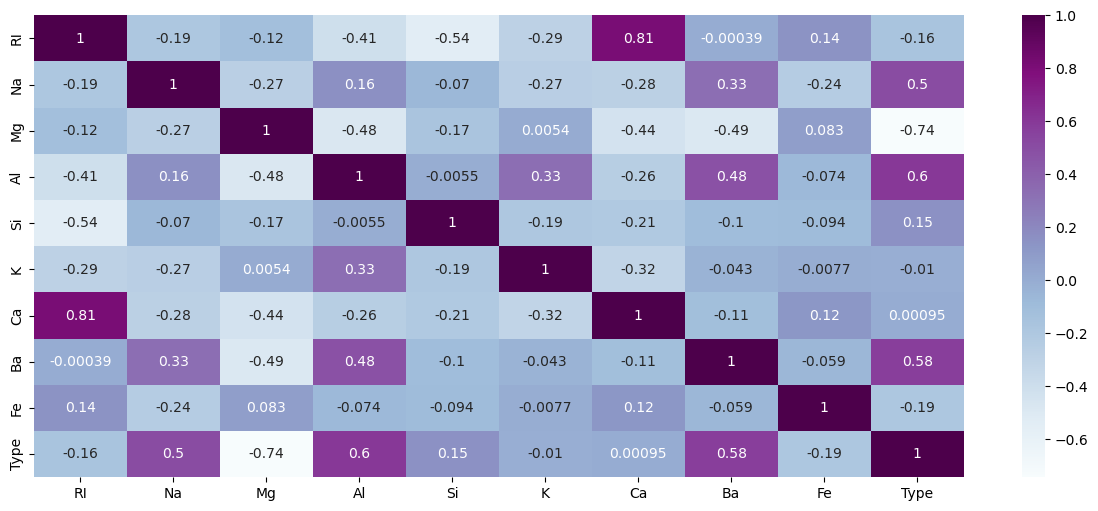

In [7]:
cr = df.corr()
plt.figure(figsize=(15,6))
sb.heatmap(cr, annot=True, cmap='BuPu')
plt.show()

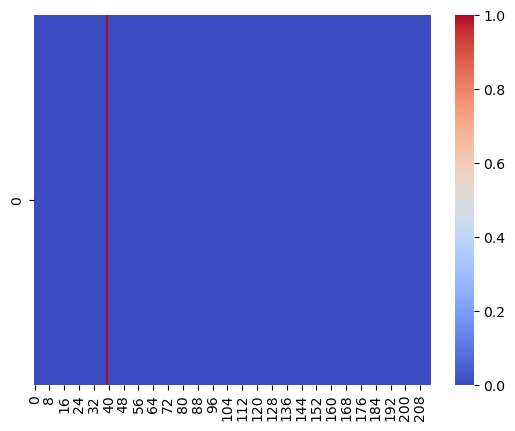

In [8]:
sb.heatmap(df.duplicated().to_frame().T, cmap='coolwarm')
plt.show()

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [11]:
x = df.iloc[:,:9]
x.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

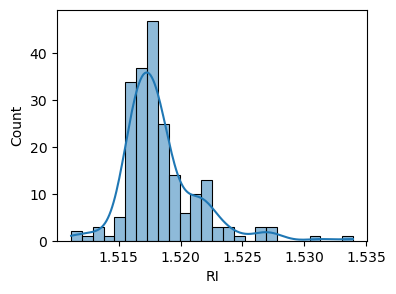

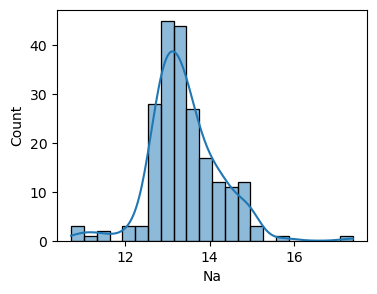

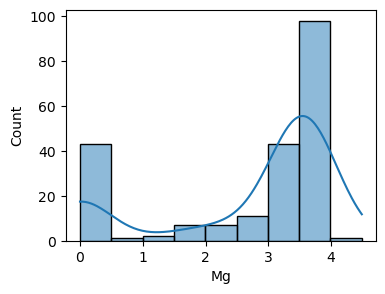

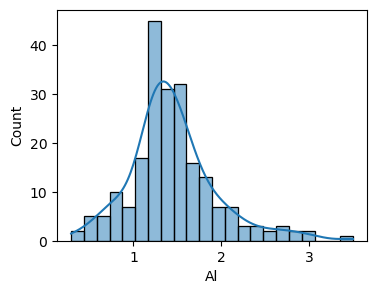

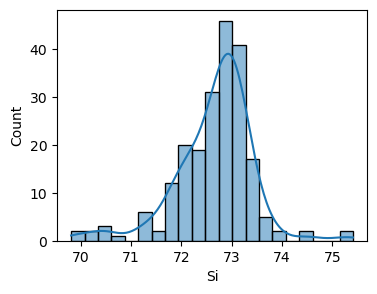

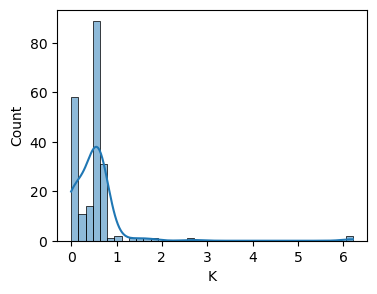

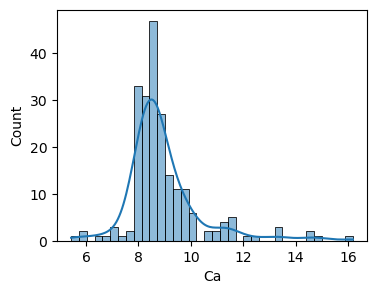

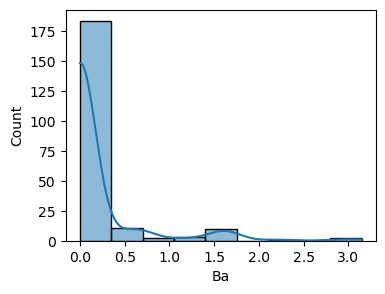

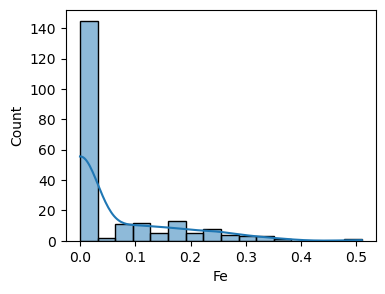

In [12]:
for i in x.columns:
    plt.figure(figsize=(4,3))
    sb.histplot(df[i], kde=True)
    plt.show()

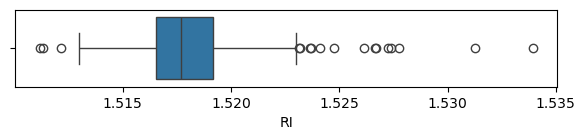

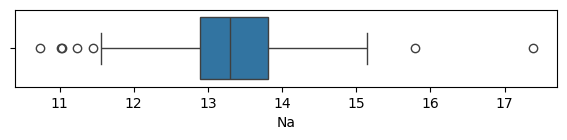

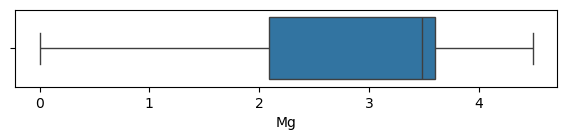

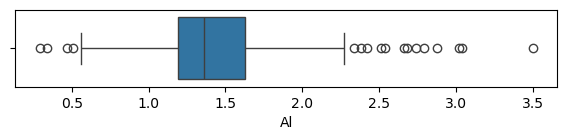

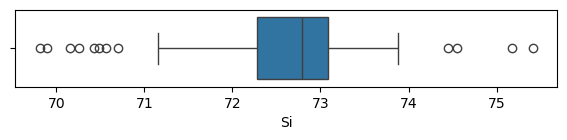

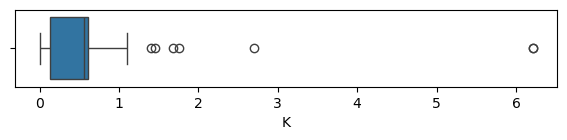

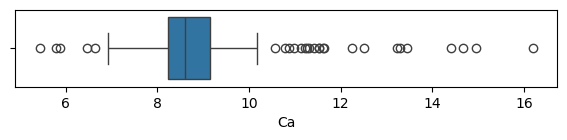

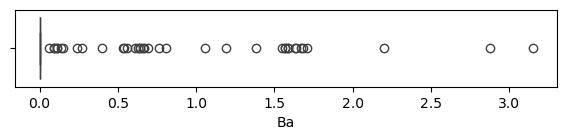

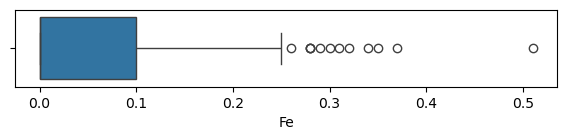

In [13]:
for i in x.columns:
    plt.figure(figsize=(7,1))
    sb.boxplot(df[i], orient='h')
    plt.show()

In [14]:
outlier_variables = x.drop(columns=['Mg'])
outlier_variables = outlier_variables.columns

In [15]:
def outlier_limits(var):
    Q1 = np.percentile(df[var],25)
    Q3 = np.percentile(df[var],75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
      
    return upper_limit, lower_limit    

In [16]:
def check_outliers(var):
    
    upper_w, lower_w = outlier_limits(var) 
    
    if df[( df[var] > upper_w  )|( df[var] < lower_w  )].shape[0]:
        treat_outliers(var, upper_w, lower_w)  

In [17]:
def treat_outliers(var, upper_limit, lower_limit):      
           
    if df[  df[var] < lower_limit ].shape[0]:        
        df.loc[ df[var] < lower_limit, var ] = lower_limit
        
    if df[  df[var] > upper_limit ].shape[0]:        
        df.loc[ df[var] > upper_limit, var ] = upper_limit

In [18]:
for var in outlier_variables:    
    check_outliers(var)

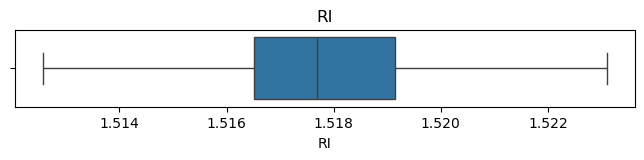

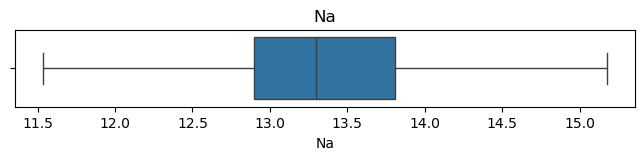

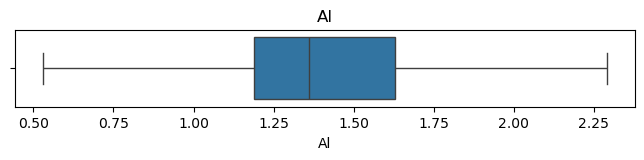

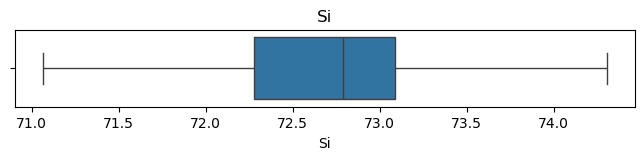

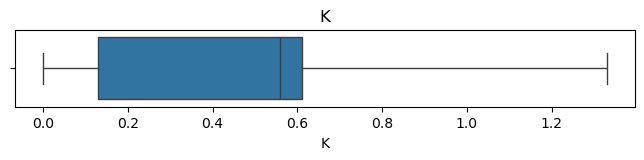

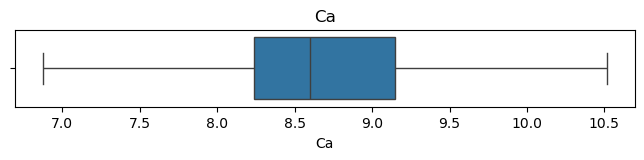

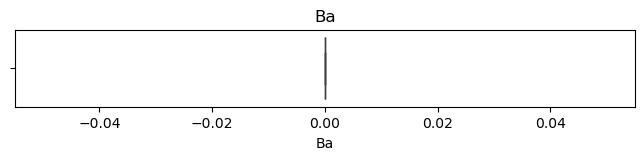

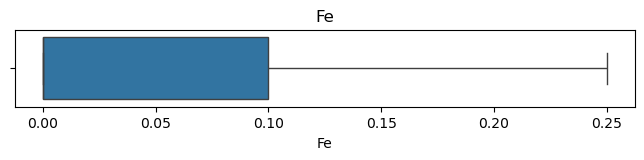

In [19]:
for var in outlier_variables:    
    plt.figure(figsize=(8,1))
    sb.boxplot(df[var],orient='h')
    plt.title(var)
    plt.show()

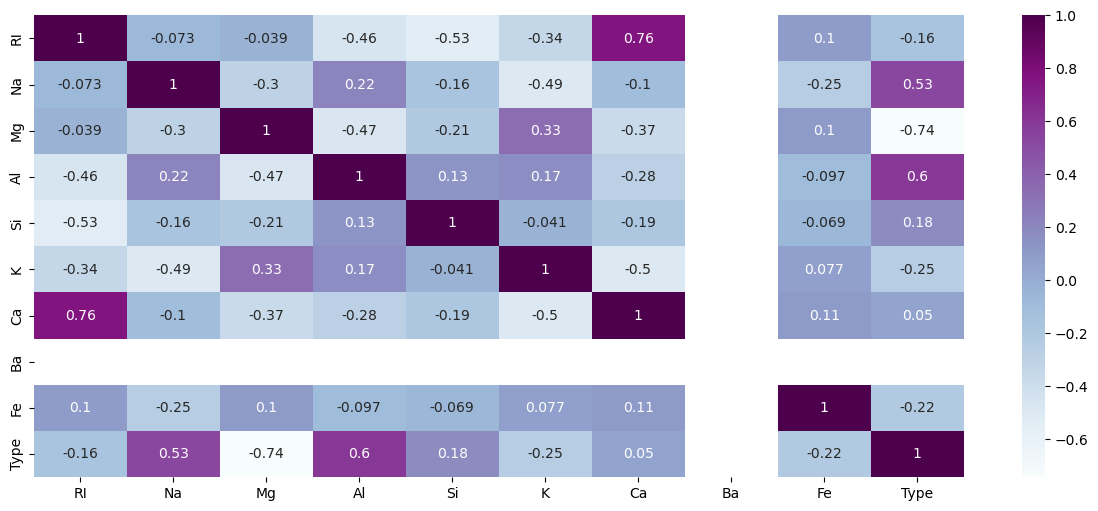

In [20]:
cr = df.corr()
plt.figure(figsize=(15,6))
sb.heatmap(cr, annot=True, cmap='BuPu')
plt.show()

In [21]:
x = x.drop(columns=['Ba'])

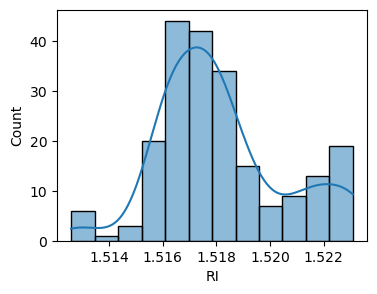

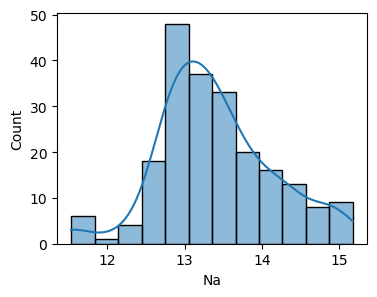

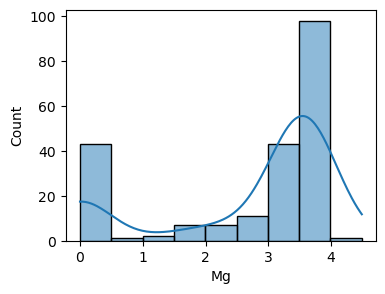

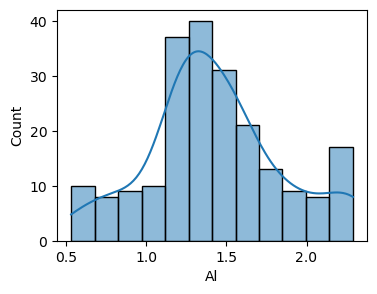

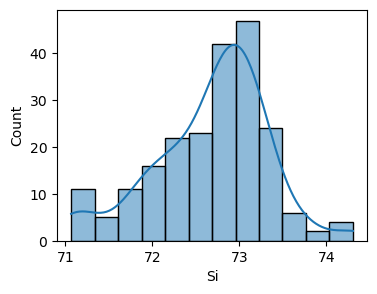

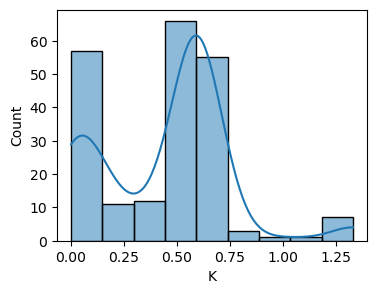

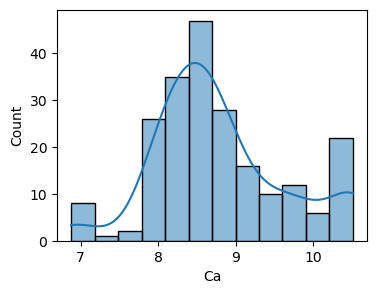

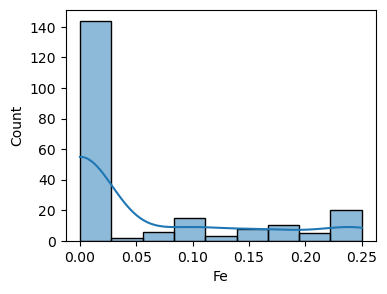

In [22]:
for i in x.columns:
    plt.figure(figsize=(4,3))
    sb.histplot(df[i], kde=True)
    plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_x = ss.fit_transform(x)
new_x = pd.DataFrame(ss_x)
new_x.columns = list(x.columns)

In [24]:
y = df.iloc[:,9:]
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [25]:
x

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#x_train.shape, x_test.shape, y_train.shape, y_test.shape

r_forest = RandomForestClassifier(n_estimators=100, random_state=42)

r_forest.fit(x_train, y_train)
r_forest.fit(x_test, y_test)

yhat_train = r_forest.predict(x_train)
yhat_test = r_forest.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score
class_report_train = classification_report(y_train, yhat_train)
class_report_test = classification_report(y_test, yhat_test)

print(f'Training:{class_report_train} {'-'*100}\n Testing:{class_report_test}')

Training:              precision    recall  f1-score   support

           1       0.71      0.76      0.74        51
           2       0.65      0.79      0.71        52
           3       1.00      0.31      0.47        13
           5       1.00      0.11      0.20         9
           6       0.60      0.50      0.55         6
           7       0.76      0.89      0.82        18

    accuracy                           0.70       149
   macro avg       0.79      0.56      0.58       149
weighted avg       0.73      0.70      0.67       149
 ----------------------------------------------------------------------------------------------------
 Testing:              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7 

In [27]:
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.ensemble import RandomForestClassifier

shuffle = ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)

cv = cross_validate(RandomForestClassifier(), x, y, cv=shuffle, scoring='accuracy', return_train_score=True)

train_score = cv['train_score']
test_score = cv['test_score']

print("Train accuracy: ", train_score.mean())
print("Test accuracy: ",test_score.mean())

Train accuracy:  1.0
Test accuracy:  0.75


In [28]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(RandomForestClassifier(), n_estimators=100, random_state=100)

bag.fit(x_train, y_train)

yhat_train = bag.predict(x_train)
yhat_test = bag.predict(x_test)

from sklearn.metrics import accuracy_score
train_result = accuracy_score(y_train, yhat_train)
test_result = accuracy_score(y_test, yhat_test)

print(f'Train:: {train_result} \n Test:: {test_result}')

Train:: 0.9865771812080537 
 Test:: 0.765625


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

gb_model.fit(x_train, y_train)

yhat_train = gb_model.predict(x_train)
yhat_test = gb_model.predict(x_test)

from sklearn.metrics import accuracy_score
gb_train_score = accuracy_score(y_train, yhat_train)
gb_test_score = accuracy_score(y_test, yhat_test)

print(f'Train:: {train_result} \n Test:: {test_result}')

Train:: 0.9865771812080537 
 Test:: 0.765625


In [30]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200,300, 500],
    'learning_rate': [0.1, 0.5, 1, 5]
}


g_search = GridSearchCV(gb_model, param_grid=parameters, cv=10, scoring='accuracy')
g_search.fit(x_train, y_train)

print("Best hyperparameters:", g_search.best_params_)
print("Best score:", g_search.best_score_)

best_rf_model = g_search.best_estimator_
best_rf_model.fit(x_train, y_train)
y_pred_test_best = best_rf_model.predict(x_test)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)

Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best score: 0.7190476190476189
Test accuracy of best model: 0.78125


### Q1. Explain Bagging and Boosting methods. How is it different from each other.

* Both are ensemble learning techniques, that combines multiple models to improve accuracy.
* <i>Bagging</i> reduces variance by training multiple models independntly in parallel.
* <i>Boosting</i> reduces bias by trainig models sequentially, each model correcting the previous error.

### Q2. Explain how to handle imbalance in the data?

*<i> Oversampling:</i> add more examples of minority class

*<i> Undersampling:</i> remove samples from majority class

*<i> Use class weights:</i> many models allow to set class_weight:'balanced'

*<i> Ensemble methods: </i> Use ensemble methods like RandomForest, XGBoost, LightGBM

*<i> Threshold: </i> adjust the threshold to favour the minority class